Questions intended for exploration in this project:

Importing Dependencies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Loading the data

In [27]:
df = pd.read_csv('education_career_success.csv')
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S001,22,Male,3.8,1450,3.6,Computer Science,3,7,2,8,7,3,85000,8,2,Mid,7,No
1,S002,24,Female,3.6,1380,3.4,Business,2,5,3,7,6,2,65000,7,3,Mid,6,No
2,S003,21,Male,3.9,1520,3.8,Engineering,4,9,4,9,8,4,120000,9,1,Senior,6,No
3,S004,23,Female,3.5,1300,3.2,Psychology,1,3,1,6,5,1,48000,6,4,Entry,8,No
4,S005,25,Male,3.7,1420,3.5,Medicine,2,6,2,8,7,3,95000,8,2,Mid,5,No


In [28]:
#since the Enterpreneurship column adds no element of variability to our dataset, we delete it completely
del df['Entrepreneurship']
#we will also delete student ID since it gets in the way of the rest of our analysis

del df['Student_ID']

print(df.head())

   Age  Gender  High_School_GPA  SAT_Score  University_GPA    Field_of_Study  \
0   22    Male              3.8       1450             3.6  Computer Science   
1   24  Female              3.6       1380             3.4          Business   
2   21    Male              3.9       1520             3.8       Engineering   
3   23  Female              3.5       1300             3.2        Psychology   
4   25    Male              3.7       1420             3.5          Medicine   

   Internships_Completed  Projects_Completed  Certifications  \
0                      3                   7               2   
1                      2                   5               3   
2                      4                   9               4   
3                      1                   3               1   
4                      2                   6               2   

   Soft_Skills_Score  Networking_Score  Job_Offers  Starting_Salary  \
0                  8                 7           3            8

/tmp/ipython-input-768176218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Current_Job_Level', inner='stick', palette='Dark2')


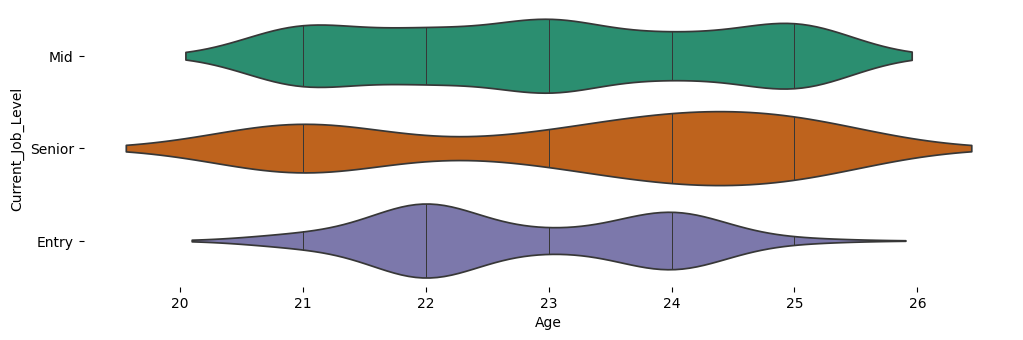

In [5]:
# @title Current_Job_Level vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Current_Job_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Current_Job_Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-3709104072.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='High_School_GPA', y='Current_Job_Level', inner='stick', palette='Dark2')


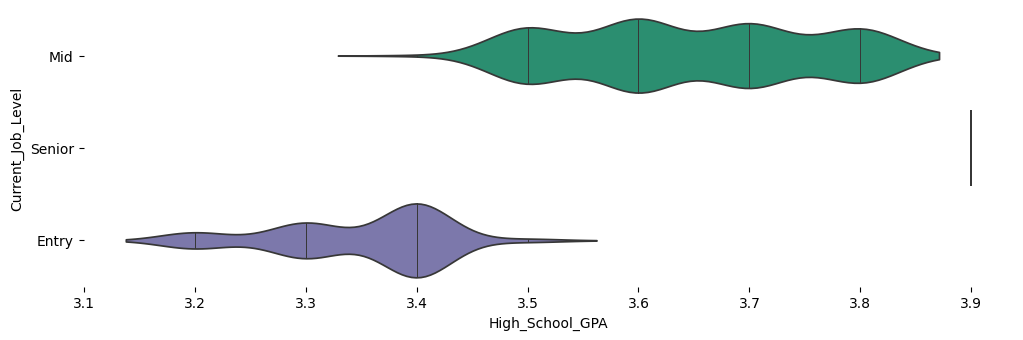

In [6]:
# @title Current_Job_Level vs High_School_GPA

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Current_Job_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='High_School_GPA', y='Current_Job_Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

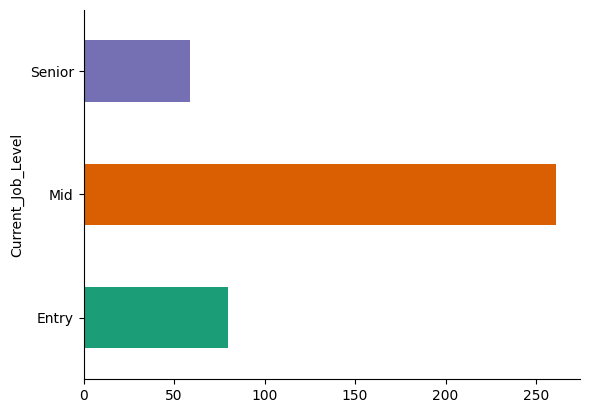

In [7]:
# @title Current_Job_Level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Current_Job_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

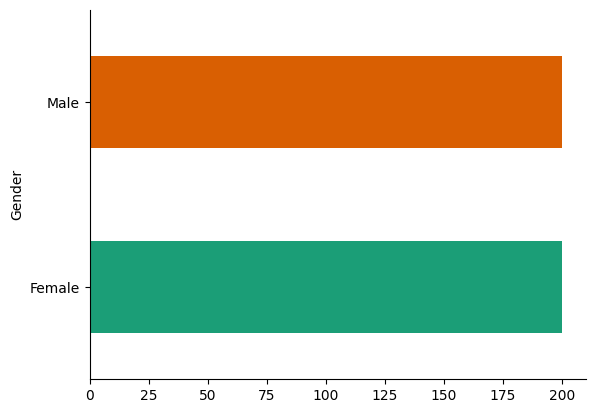

In [8]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

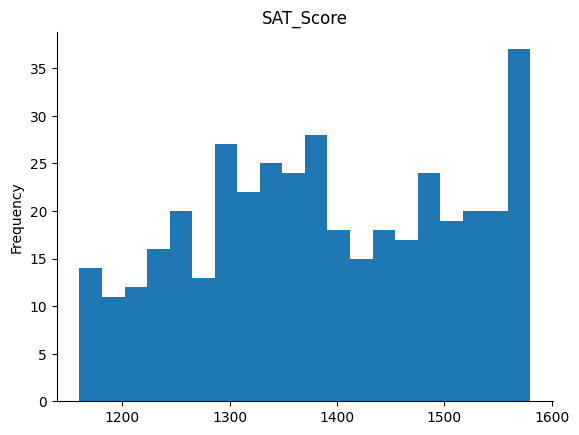

In [9]:
# @title SAT_Score

from matplotlib import pyplot as plt
df['SAT_Score'].plot(kind='hist', bins=20, title='SAT_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

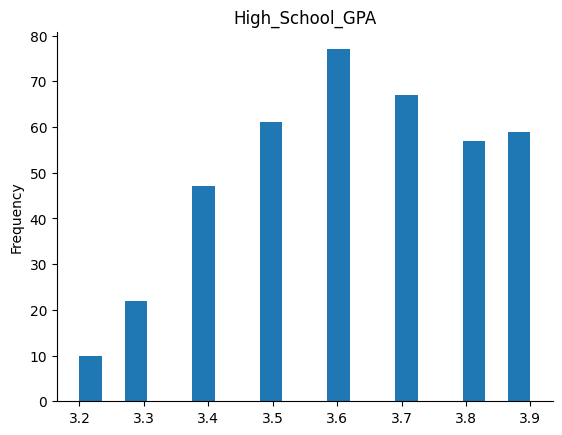

In [10]:
# @title High_School_GPA

from matplotlib import pyplot as plt
df['High_School_GPA'].plot(kind='hist', bins=20, title='High_School_GPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

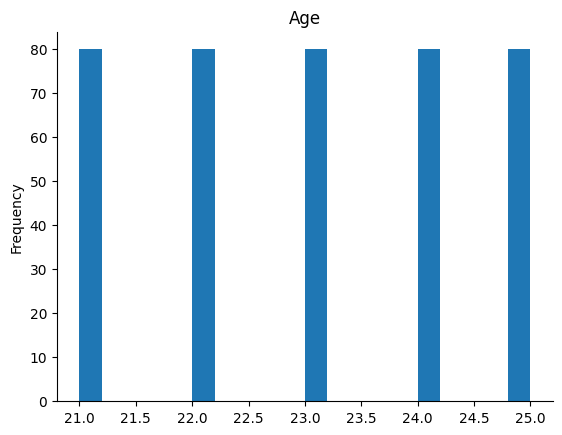

In [11]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Exploratory Data Analysis

In [29]:
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    400 non-null    int64  
 1   Gender                 400 non-null    object 
 2   High_School_GPA        400 non-null    float64
 3   SAT_Score              400 non-null    int64  
 4   University_GPA         400 non-null    float64
 5   Field_of_Study         400 non-null    object 
 6   Internships_Completed  400 non-null    int64  
 7   Projects_Completed     400 non-null    int64  
 8   Certifications         400 non-null    int64  
 9   Soft_Skills_Score      400 non-null    int64  
 10  Networking_Score       400 non-null    int64  
 11  Job_Offers             400 non-null    int64  
 12  Starting_Salary        400 non-null    int64  
 13  Career_Satisfaction    400 non-null    int64  
 14  Years_to_Promotion     400 non-null    int64  
 15  Curren

,0
Age,int64
Gender,object
High_School_GPA,float64
SAT_Score,int64
University_GPA,float64
Field_of_Study,object
Internships_Completed,int64
Projects_Completed,int64
Certifications,int64
Soft_Skills_Score,int64


In [30]:
#checking if there are NaNs/Missing Values
print(df[df.isna().any(axis=1)])
print(df.isna().sum())


Empty DataFrame
Columns: [Age, Gender, High_School_GPA, SAT_Score, University_GPA, Field_of_Study, Internships_Completed, Projects_Completed, Certifications, Soft_Skills_Score, Networking_Score, Job_Offers, Starting_Salary, Career_Satisfaction, Years_to_Promotion, Current_Job_Level, Work_Life_Balance]
Index: []
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
dtype: int64


To further make sure that no missing values exist in our dataset, we will check the different "kinds of datatypes" per column and the recurrence of each.

In [31]:
for col in df.columns:
    unique_types = df[col].map(type).unique()
    print(f"Column '{col}' contains types: {unique_types}")
for col in df.columns:
    unique_types = df[col].map(type).unique()
    type_counts = df[col].map(type).value_counts()
    if len(unique_types) > 1 and len(type_counts) > 1:
        print(f"Column '{col}' has multiple types: {unique_types}")
        print(f"Column '{col}' type breakdown:")
        print(type_counts)

Column 'Age' contains types: [<class 'int'>]
Column 'Gender' contains types: [<class 'str'>]
Column 'High_School_GPA' contains types: [<class 'float'>]
Column 'SAT_Score' contains types: [<class 'int'>]
Column 'University_GPA' contains types: [<class 'float'>]
Column 'Field_of_Study' contains types: [<class 'str'>]
Column 'Internships_Completed' contains types: [<class 'int'>]
Column 'Projects_Completed' contains types: [<class 'int'>]
Column 'Certifications' contains types: [<class 'int'>]
Column 'Soft_Skills_Score' contains types: [<class 'int'>]
Column 'Networking_Score' contains types: [<class 'int'>]
Column 'Job_Offers' contains types: [<class 'int'>]
Column 'Starting_Salary' contains types: [<class 'int'>]
Column 'Career_Satisfaction' contains types: [<class 'int'>]
Column 'Years_to_Promotion' contains types: [<class 'int'>]
Column 'Current_Job_Level' contains types: [<class 'str'>]
Column 'Work_Life_Balance' contains types: [<class 'int'>]


Lucky for us, this dataset is void of missing values and/or placeholders for missing values, i.e. each column contains only one datatype.

Let's now uncover some basic statistics about our dataset.

['Computer Science' 'Business' 'Engineering' 'Psychology' 'Medicine'
 'Education' 'Arts' 'Law' 'Finance' 'Marketing' 'Nursing']
Total number of unique fields of study is 11
Field_of_Study
Business            72
Engineering         58
Psychology          55
Computer Science    49
Law                 44
Marketing           44
Medicine            35
Arts                32
Finance              5
Education            3
Nursing              3
Name: count, dtype: int64


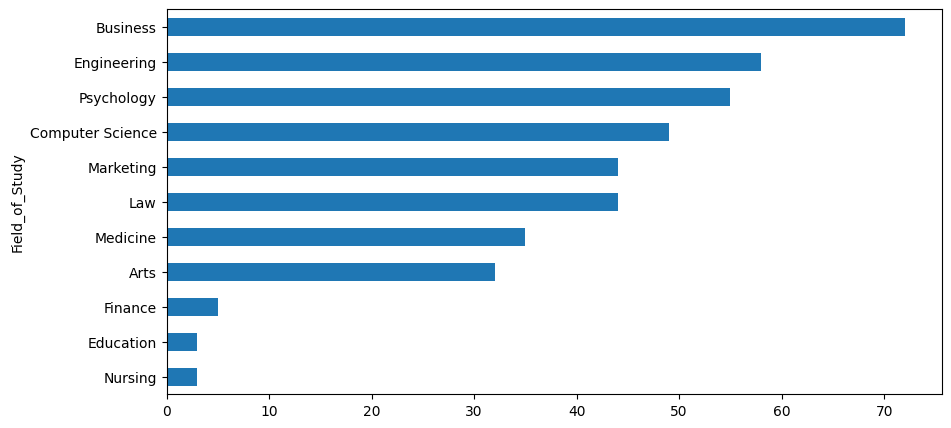

In [32]:
fieldUnique = df['Field_of_Study'].unique()
print(fieldUnique)
print(f"Total number of unique fields of study is {len(fieldUnique)}")

countfieldUnique = df['Field_of_Study'].value_counts()
print(countfieldUnique)

firstPlot = countfieldUnique.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 5))
plt.title = "Popularity of Each Field of Study"
plt.xlabel = "Field of Study"
plt.ylabel = "Count"
plt.show()

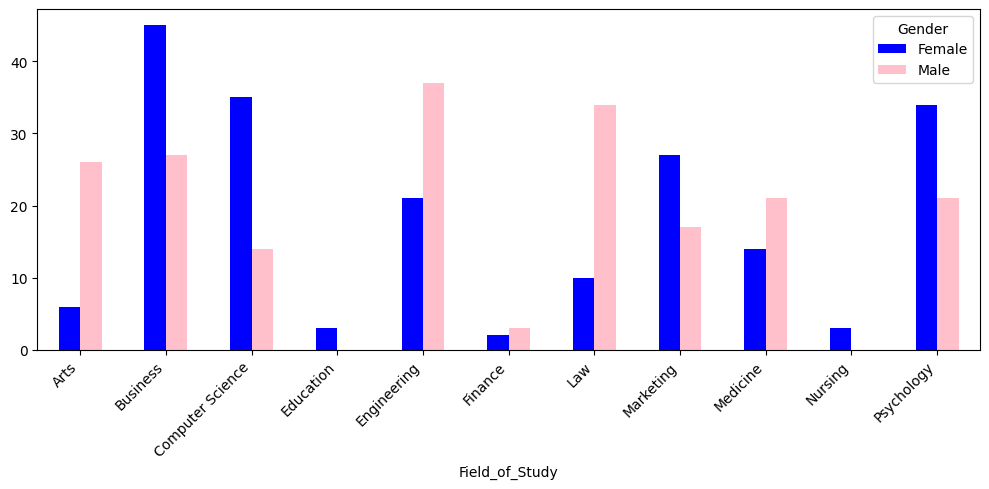

In [33]:
counts = df.groupby(['Field_of_Study', 'Gender']).size().unstack(fill_value=0)
ax = counts.plot(
    kind='bar',
    figsize=(10, 5),
    color=['blue', 'pink'])

plt.title = "Field of Study by Gender"
plt.xlabel = "Field of Study"
plt.ylabel = "Number of People"
plt.legend(title='Gender')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2215586954.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax.boxplot(data_salary, patch_artist=True, labels=fields)


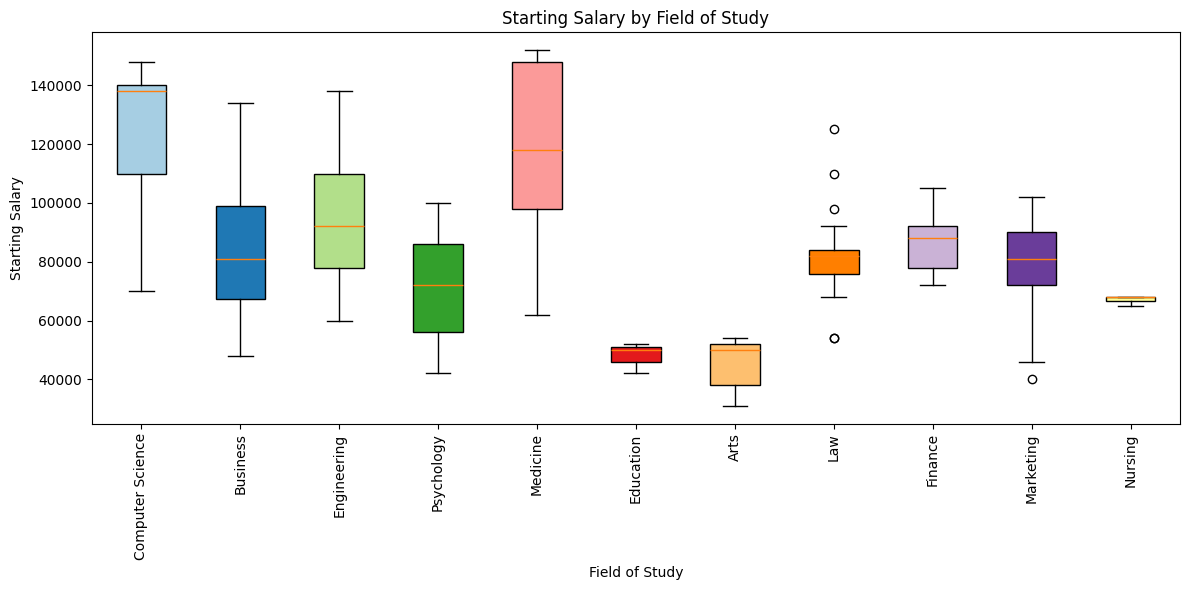

/tmp/ipython-input-2215586954.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax.boxplot(data_offers, patch_artist=True, labels=fields)


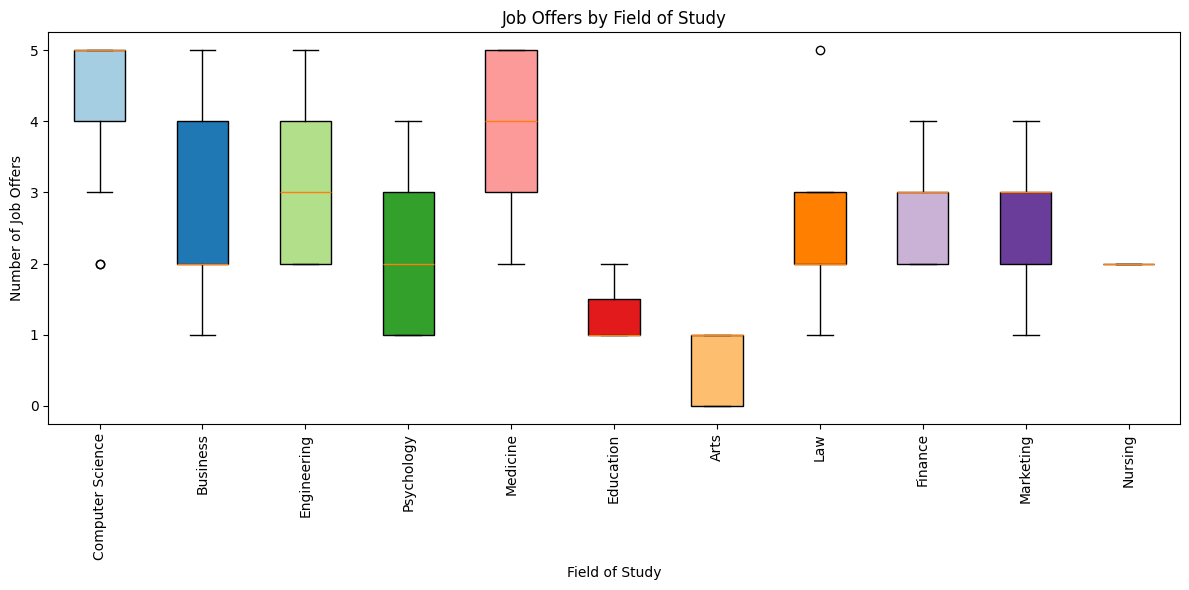

In [34]:
import importlib
import matplotlib
importlib.reload(matplotlib.pyplot)
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fields = df['Field_of_Study'].unique()
data_salary = [df.loc[df['Field_of_Study'] == f, 'Starting_Salary'] for f in fields]
data_offers = [df.loc[df['Field_of_Study'] == f, 'Job_Offers'] for f in fields]

fig, ax = plt.subplots(figsize=(12, 6))
bp1 = ax.boxplot(data_salary, patch_artist=True, labels=fields)
ax.set_title('Starting Salary by Field of Study')
ax.set_xlabel('Field of Study')
ax.set_ylabel('Starting Salary')
plt.setp(ax.get_xticklabels(), rotation=90)

colors = plt.cm.Paired.colors
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
bp2 = ax.boxplot(data_offers, patch_artist=True, labels=fields)
ax.set_title('Job Offers by Field of Study')
ax.set_xlabel('Field of Study')
ax.set_ylabel('Number of Job Offers')
plt.setp(ax.get_xticklabels(), rotation=90)

for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()


#Machine Learning

Building a pipeline

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [76]:
def preprocessing_input(data):
  for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors = 'ignore')
  numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
  categorical_features = data.select_dtypes(include=['object']).columns
  numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())])
  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder(handle_unknown='ignore'))])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)])
  return preprocessor

In [77]:
def grid_search(model, param_grid, X_train, y_train):
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  grid_search = GridSearchCV(model, param_grid, cv=kf)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_
  best_model = grid_search.best_estimator_
  print(f"Best parameters for {model}: {best_params}")
  print(f"Best cross-validation score for {model}: {best_score}")
  print(f"Best model for {model}: {best_model}")
  return best_params, best_score, best_model

In [78]:
X= df.drop(columns = ['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

preprocessor = preprocessing_input(X_train)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

y_encoder = LabelEncoder()
y_train_encoded = y_encoder.fit_transform(y_train)  # e.g., male/female → 0/1
y_test_encoded = y_encoder.transform(y_test)


log_reg = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()

myModels = [log_reg, DTC, RFC]


param_grid_log_reg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_DTC = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_RFC = {'n_estimators': [10, 50, 100, 200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

myParamGrids = [param_grid_log_reg, param_grid_DTC, param_grid_RFC]

best_models = []

for model, param_grid in zip(myModels, myParamGrids):
  score, cv, estimator = grid_search(model, param_grid, X_train_processed, y_train_encoded)
  best_models.append(estimator)

print(best_models)

/tmp/ipython-input-1945561745.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors = 'ignore')
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

Best parameters for LogisticRegression(): {'C': 10}
Best cross-validation score for LogisticRegression(): 0.8375
Best model for LogisticRegression(): LogisticRegression(C=10)
Best parameters for DecisionTreeClassifier(): {'max_depth': 8}
Best cross-validation score for DecisionTreeClassifier(): 0.9375
Best model for DecisionTreeClassifier(): DecisionTreeClassifier(max_depth=8)
Best parameters for RandomForestClassifier(): {'max_depth': 8, 'n_estimators': 10}
Best cross-validation score for RandomForestClassifier(): 0.953125
Best model for RandomForestClassifier(): RandomForestClassifier(max_depth=8, n_estimators=10)
[LogisticRegression(C=10), DecisionTreeClassifier(max_depth=8), RandomForestClassifier(max_depth=8, n_estimators=10)]


Evaluating the Models

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0, zero_division=1)
    recall = recall_score(y_test, y_pred, pos_label=0, zero_division=1)
    f1 = f1_score(y_test, y_pred, pos_label=0, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

model_metrics = []
for model in best_models:
    trained_model = train_model(model, X_train_processed, y_train_encoded)
    accuracy, precision, recall, f1, conf_matrix = test_model(trained_model, X_test_processed, y_test_encoded)

    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

    model_metrics.append({
        "model": trained_model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "conf_matrix": conf_matrix
    })

best_model_entry = max(model_metrics, key=lambda x: x['accuracy'])
best_model = best_model_entry['model']

print(f"Best Model based on Accuracy: {best_model}")
print(f"Accuracy: {best_model_entry['accuracy']}")
print(f"Precision: {best_model_entry['precision']}")
print(f"Recall: {best_model_entry['recall']}")
print(f"F1 Score: {best_model_entry['f1']}")
print(f"Confusion Matrix:\n{best_model_entry['conf_matrix']}")


Model: LogisticRegression(C=10)
Accuracy: 0.8625
Precision: 0.8717948717948718
Recall: 0.85
F1 Score: 0.8607594936708861
Confusion Matrix:
[[34  6]
 [ 5 35]]

Model: DecisionTreeClassifier(max_depth=8)
Accuracy: 0.925
Precision: 0.925
Recall: 0.925
F1 Score: 0.925
Confusion Matrix:
[[37  3]
 [ 3 37]]

Model: RandomForestClassifier(max_depth=8, n_estimators=10)
Accuracy: 0.9125
Precision: 0.9230769230769231
Recall: 0.9
F1 Score: 0.9113924050632911
Confusion Matrix:
[[36  4]
 [ 3 37]]

Best Model based on Accuracy: DecisionTreeClassifier(max_depth=8)
Accuracy: 0.925
Precision: 0.925
Recall: 0.925
F1 Score: 0.925
Confusion Matrix:
[[37  3]
 [ 3 37]]
